使用sklearn调包实现SVM

In [1]:
from sklearn import svm
from sklearn import datasets 
import numpy as np

使用SVM实现数据的分类

In [2]:
# 使用datasets中的数据
load_iris = datasets.load_iris
data_ir = load_iris().data  #花的种类数据
tar_ir = load_iris().target  #花的种类


# 训练数据
data_ir_train = data_ir[:-20]
tar_ir_train = tar_ir[:-20] 

In [3]:
# 加载模型的参数
mod_1 = svm.SVC()
mod_1.fit(data_ir_train,tar_ir_train)
pre_class = mod_1.predict(data_ir[-10:])

num = np.random.randint(0,len(data_ir),20) #构建测试数据

data_ir_test = np.array([data_ir[i] for i in num])
tar_ir_class = np.array([tar_ir[i] for i in num]) #原本的数据类型


# 数据的预测
tar_ir_pre = mod_1.predict(data_ir_test)
print('测试的数据种类为',tar_ir_pre)
print('原本的数据种类为',tar_ir_class)

测试的数据种类为 [2 2 0 1 2 0 2 1 0 2 1 1 2 0 2 2 1 0 2 0]
原本的数据种类为 [2 2 0 1 2 0 2 1 0 2 1 1 2 0 2 2 1 0 2 0]


使用SVM实现回归模型

In [4]:
mod_2 = svm.SVR(kernel = "linear") #加载线性规划模型

N = 150
x = np.linspace(-3,3,N).reshape(-1,1)

y = 3 * x + 5

y_loss = y + np.random.rand(N,1) - 0.5 #加了噪声的y值

mod_2.fit(x,y_loss)
print('a值为',mod_2.coef_)
print('b值为',mod_2.intercept_)

a值为 [[3.03041312]]
b值为 [5.02394758]


f:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


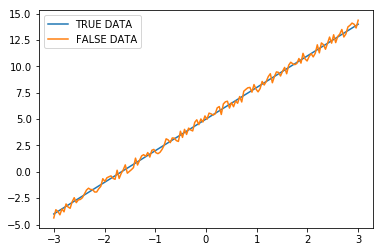

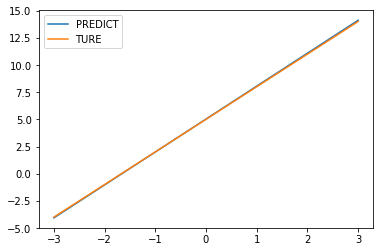

In [7]:
import matplotlib.pyplot as plt

plt.plot(x,y,label = 'TRUE DATA')
plt.plot(x,y_loss,label = 'FALSE DATA')
plt.legend()
plt.show()

# 使用模型得到的b值和a值来写出回归曲线

a = mod_2.coef_[0][0]
b = mod_2.intercept_[0]

y_pre = x * a + b

plt.plot(x,y_pre,label = 'PREDICT') #模型得到的值进行预测
plt.plot(x,y,label = 'TURE') #原本的数据
plt.legend()
plt.show()

实现SMO算法

    高斯核函数
    
    k(x,y) = exp(-lamd * ||x - y|| ** 2)

In [8]:
def tar_fun(alpha,Q):  #原函数
    one_mat = np.ones(len(alpha)) #构建单位矩阵
    return 0.5 * alpha.T @ Q @ alpha - one_mat.T @ alpha
    # Q(n,n)
    #alpha (n,1)


def Q_fun(x1,x2,y1,y2,lamd):
    len_1 = len(y1)
    len_2 = len(y2)
    Q = np.zeros((len_1,len_2))  # m * n
    for i in range(len_1):
        for j in range(len_2):
            Q[i][j] = y1[i] * y2[j] * np.exp(-lamd * np.sum((x1[i] - x2[j]) ** 2))
            # (1,1) * (1,1) * (1)
    return Q


def Q_fun_2(x1,x2,lamd):
    len_1 = len(x1)
    len_2 = len(x2)
    Q = np.zeros((len_1,len_2))  # m * n
    for i in range(len_1):
        for j in range(len_2):
            Q[i][j] = np.exp(-lamd * np.sum((x1[i] - x2[j]) ** 2))
            # (1,1) * (1,1) * (1)
    return Q


In [9]:
# 构建数据
N = 50
lamd = 100
x = np.linspace(-5,5,N).reshape(-1,1)

y = np.random.randint(-1,2,N)  #label
y[y==0] = 1
Q = Q_fun(x,x,y,y,lamd)

# 通过scipy中的minimize进行分类参数的预估
from scipy.optimize import minimize


# 实现约束条件
from scipy.optimize import Bounds
from scipy.optimize import LinearConstraint  
linear_constraint = LinearConstraint(y, [0], [0])  #实现y*a = 0
bounds = Bounds(np.zeros(N), 10 * np.ones(N))  #  0 <  altha < C


res = minimize(tar_fun, np.ones(N),
               constraints=linear_constraint,
               bounds=bounds,args = Q)
print(res)

     fun: -20.860806778560555
     jac: array([-0.40039277,  0.4004848 ,  0.40040994,  0.40040612,  0.40040588,
        0.40040588,  0.40038371, -0.40038371, -0.40036178, -0.40036178,
       -0.40035415, -0.40036178, -0.40035415, -0.40037632,  0.40035415,
       -0.40037632, -0.40036178, -0.40036917, -0.40037632,  0.40037656,
        0.40037632, -0.40038395, -0.40036893, -0.40038395,  0.40038371,
        0.40037656, -0.40039849,  0.40036917, -0.40038371, -0.40037632,
        0.40036178, -0.40038371, -0.40035415, -0.40038371,  0.40035391,
       -0.40037632, -0.40035439, -0.40036201, -0.40035439, -0.40035415,
       -0.40036178, -0.40035415, -0.40037656,  0.40035415, -0.40037632,
       -0.40035415, -0.40036178, -0.40035796, -0.40045524, -0.40037036])
 message: 'Optimization terminated successfully'
    nfev: 153
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([0.62118041, 1.38904534, 1.35774262, 1.35822467, 1.35822467,
       1.35774238, 1.38880431, 0.61216051, 0.581

In [ ]:
# 使用sklearn来进行分类

# 预测数据
x_test = x[10:]

Q1 = Q_fun_2(x,x,lamd)

mod_3 = svm.SVC(kernel='precomputed')
mod_3.fit(Q,y)


[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.43056906 0.42347879 0.43267066
 0.43221528 0.43223867 0.4322039  0.4324159  0.42346646 0.42347075
 0.43237184 0.43186642 0.42341789 0.4228855  0.43254687 0.42289874
 0.41466772 0.42358336 0.42358336 0.4234701  0.43200875 0.42343954
 0.42344513 0.43235775 0.43228892 0.43171239 0.431776   0.43231627
 0.43243694 0.42347823 0.422947   0.43235028 0.43228042 0.43227086
 0.43242864 0.43844161]


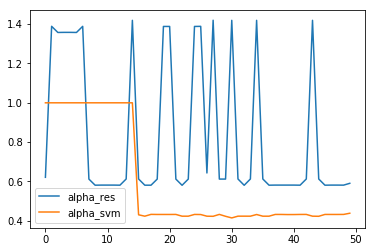

In [12]:
alpha_svm = abs(mod_3.dual_coef_).ravel()
print(alpha_svm)
# 画图进行对比

plt.plot(res.x,label = 'alpha_res')
plt.plot(alpha_svm,label = 'alpha_svm')
plt.legend()
plt.show()